In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import the data frame and add the meta data to the segments
data = pd.read_parquet(Path('data/datasets/chu_dataset/cases/'))
data['label_id'] = data['label_id'].astype(str) + "_" + data['caseid'].astype(str)

#get columns name with _0 and rename them with _10
data = data.rename(columns={col: col.replace('_0', '_10') for col in data.columns if '_0' in col})

static = pd.read_parquet('data/datasets/chu_dataset/meta.parquet')

data_chu = data.merge(static, on='caseid')

In [4]:
dataset_name = '30_s_dataset'

data = pd.read_parquet(Path(f'data/datasets/{dataset_name}/cases/'))
data['label_id'] = data['label_id'].astype(str) + "_" + data['caseid'].astype(str)

static = pd.read_parquet(f'data/datasets/{dataset_name}/meta.parquet')

data_vdb = data.merge(static, on='caseid')


In [5]:

print(f"Number of cases in the vdb dataset:  {len(data_vdb['caseid'].unique())}")
print(f"Number of cases in the test set:  {len(data_vdb[data_vdb['split']=='test'].caseid.unique())}")
print(f"Number of cases in the train set:  {len(data_vdb[data_vdb['split']=='train'].caseid.unique())}")

Number of cases in the vdb dataset:  2153
Number of cases in the test set:  646
Number of cases in the train set:  1507


In [6]:
# compute the number of cases in vitaldb that include at least one positive label
print(f"Number of cases in the vdb dataset that include at least one positive label:  {len(data_vdb[data_vdb['label']==1].caseid.unique())}")
print(f"This is {len(data_vdb[data_vdb['label']==1].caseid.unique())/len(data_vdb['caseid'].unique())*100:.2f}% of the cases in the dataset")
print(f"Prevalence of positive labels in the vdb dataset:  {len(data_vdb[data_vdb['label']==1])/len(data_vdb):.2%}")

Number of cases in the vdb dataset that include at least one positive label:  1358
This is 63.07% of the cases in the dataset
Prevalence of positive labels in the vdb dataset:  6.40%


In [7]:
print(f'Total number of patient in the CHU dataset: {len(data_chu["caseid"].unique())}')
print(f'Total number of segements in the CHU dataset: {len(data_chu)}')
print('\n')
# compute the number of cases in vitaldb that include at least one positive label
print(f"Number of cases in the chu dataset that include at least one positive label:  {len(data_chu[data_chu['label']==1].caseid.unique())}")
print(f"This is {len(data_chu[data_chu['label']==1].caseid.unique())/len(data_chu['caseid'].unique())*100:.2f}% of the cases in the dataset")
print(f"Prevalence of positive labels in the chu dataset:  {len(data_chu[data_chu['label']==1])/len(data_chu):.2%}")

print(f"Number of cases in the dataset: {len(data_chu['caseid'].unique())}")

Total number of patient in the CHU dataset: 545
Total number of segements in the CHU dataset: 71707


Number of cases in the chu dataset that include at least one positive label:  508
This is 93.21% of the cases in the dataset
Prevalence of positive labels in the chu dataset:  21.79%
Number of cases in the dataset: 545


In [8]:
# compare both data set

info_chu = data_chu.describe()

info_vdb = data_vdb.describe()

info_all = pd.concat((info_chu, info_vdb))

info_all.drop(columns=[col for col in info_all.columns if 'std' in col])

,mbp_constant_30,mbp_slope_30,sbp_constant_30,sbp_slope_30,dbp_constant_30,dbp_slope_30,hr_constant_30,hr_slope_30,rr_constant_30,rr_slope_30,...,time,time_before_IOH,age,height,weight,bmi,asa,caseid,preop_cr,preop_htn
count,71707.000000,71707.0,71707.000000,71707.0,71707.000000,71707.0,71707.000000,71707.0,71707.000000,71707.0,...,71707,15628.000000,71707.000000,70370.000000,71707.000000,70370.000000,69683.000000,NaN,NaN,NaN
mean,80.508865,0.0,112.171280,0.0,62.530396,0.0,60.026295,0.0,14.283481,0.0,...,0 days 02:15:22.160597989,358.932685,66.023959,169.840074,78.007992,26.851305,3.003746,NaN,NaN,NaN
std,11.184732,0.0,22.160955,0.0,10.576623,0.0,25.440702,0.0,4.825193,0.0,...,0 days 01:45:57.316915480,138.121162,10.674518,7.970899,14.309996,4.490540,0.485607,NaN,NaN,NaN
min,40.107246,0.0,0.000000,0.0,-9.259931,0.0,0.000000,0.0,0.000000,0.0,...,0 days 00:09:30,150.000000,22.000000,145.000000,42.000000,16.412069,1.000000,NaN,NaN,NaN
25%,72.298717,0.0,99.000000,0.0,56.205463,0.0,52.465067,0.0,14.000000,0.0,...,0 days 01:16:00,240.000000,59.000000,165.000000,68.000000,23.738662,3.000000,NaN,NaN,NaN
50%,78.124336,0.0,108.610786,0.0,61.362526,0.0,61.796455,0.0,15.000000,0.0,...,0 days 01:50:00,360.000000,67.000000,171.000000,76.000000,26.297578,3.000000,NaN,NaN,NaN
75%,86.000000,0.0,121.221771,0.0,67.869156,0.0,73.442841,0.0,16.632390,0.0,...,0 days 02:37:00,480.000000,74.000000,175.000000,87.000000,29.387755,3.000000,NaN,NaN,NaN
max,149.904800,0.0,1112.000000,0.0,312.750275,0.0,225.000000,0.0,57.562840,0.0,...,0 days 16:41:00,600.000000,93.000000,195.000000,135.000000,49.444247,5.000000,NaN,NaN,NaN
count,597365.000000,597365.0,597365.000000,597365.0,597365.000000,597365.0,597365.000000,597365.0,597365.000000,597365.0,...,597365,38242.000000,597365.000000,NaN,NaN,597365.000000,597365.000000,597365.000000,597365.000000,597365.000000
mean,85.802773,0.0,119.919609,0.0,65.643837,0.0,69.350273,0.0,14.177906,0.0,...,0 days 02:14:32.014523783,362.609173,59.827086,NaN,NaN,23.266760,1.845034,3168.004938,0.886370,0.316088


In [9]:
bin_widths = {'mbp_ema_10': 1,
             'hr_ema_10': 1,
             'spo2_ema_10': 0.5,
             'rr_ema_10': 1,
             'sbp_ema_10': 1,
             'dbp_ema_10': 1,
             'etco2_ema_10': 1,
             'mac_ema_10': 0.2,
             'pp_ct_ema_10': 0.5}


for col in data_chu.columns:
    if col not in bin_widths:
        continue
    plt.figure()
    bin_width = bin_widths[col]
    min_val = min(data_chu[col].min(), data_vdb[col].min())
    max_val = max(data_chu[col].max(), data_vdb[col].max())
    bins = np.arange(min_val, max_val + bin_width, bin_width)
    # bins=111
    data_chu[col].hist(bins=bins, alpha=0.5, label='chu', density=True)
    data_vdb[col].hist(bins=bins, alpha=0.5, label='vdb', density=True)

    plt.legend()
    plt.title(col)


In [10]:
data_chu_raw = pd.read_parquet(Path('data/cases_chu/'))
data_chu_raw.Time = pd.to_timedelta(data_chu_raw.Time, unit="s")
data_vdb_raw = pd.read_parquet(Path('data/cases/'))

# data_vdb_raw = data_vdb_raw[data_vdb_raw.caseid.isin(data_vdb.caseid)]
data_vdb_raw = data_vdb_raw.rename(columns={    "Solar8000/ART_MBP": "mbp",
    "Solar8000/ART_SBP": "sbp",
    "Solar8000/ART_DBP": "dbp",
    "Solar8000/HR": "hr",
    "Solar8000/RR": "rr",
    "Solar8000/PLETH_SPO2": "spo2",
    "Solar8000/ETCO2": "etco2",
    "Orchestra/PPF20_CT": "pp_ct",
    "Primus/MAC": "mac",})
data_vdb_raw.Time = pd.to_timedelta(data_vdb_raw.Time, unit="s")
# data_vdb_raw.set_index(["caseid", "Time"], inplace=True)


# data_vdb_raw.sort_index(inplace=True)

In [11]:
# get the mean duration of the vdb dataset
# duration is defined as the max Time for each caseid
# Time in the second level index
print("VitalDB")
print(f"Mean duration {data_vdb_raw.groupby('caseid').Time.max().mean()}")
print(f"Min duration {data_vdb_raw.groupby('caseid').Time.max().min()}")
print(f"Max duration {data_vdb_raw.groupby('caseid').Time.max().max()}")

print("Chu")
print(f"Mean duration {data_chu_raw.groupby('caseid').Time.max().mean()}")
print(f"Min duration {data_chu_raw.groupby('caseid').Time.max().min()}")
print(f"Max duration {data_chu_raw.groupby('caseid').Time.max().max()}")

VitalDB
Mean duration 0 days 03:24:21.518454935
Min duration 0 days 00:57:47
Max duration 0 days 12:29:42
Chu
Mean duration 0 days 03:09:49.753521126
Min duration 0 days 01:07:00
Max duration 0 days 20:18:00


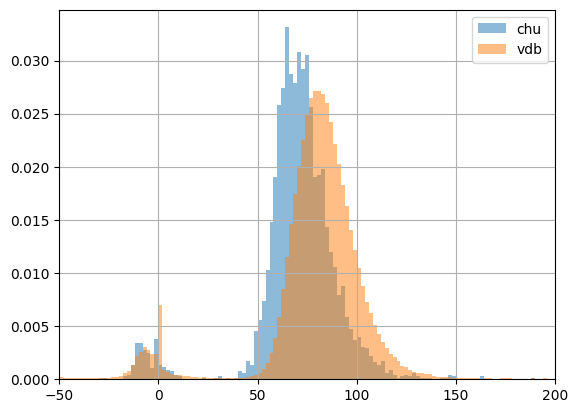

In [12]:
bin_width = 2
bins = np.arange(data_vdb_raw['mbp'].min(), data_vdb_raw['mbp'].max() + bin_width, bin_width)
data_chu_raw.mbp[::50].hist(bins=bins, alpha=0.5, label='chu', density=True)
data_vdb_raw.mbp[::50].hist(bins=bins, alpha=0.5, label='vdb', density=True)
plt.legend()
plt.xlim(-50, 200)

data_out = pd.DataFrame()
data_out['chu'] = data_chu_raw.mbp
data_out['vdb'] = data_vdb_raw.mbp
data_out[::50].to_csv('output/compare_mbp.csv')

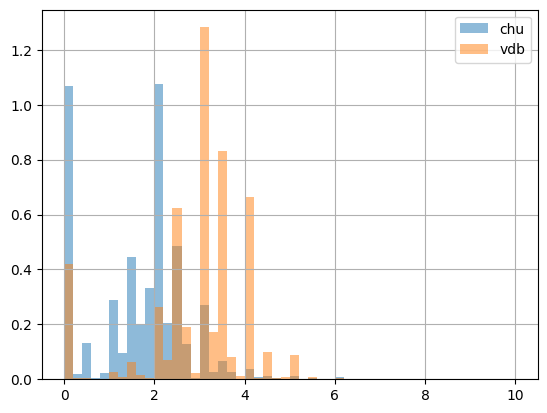

In [13]:
bin_width = 0.2
signal = 'pp_ct'
# data_vdb_raw[signal].fillna(0, inplace=True)
bins = np.arange(data_chu_raw[signal].min(), data_chu_raw[signal].max() + bin_width, bin_width)
data_chu_raw[signal].hist(bins=bins, alpha=0.5, label='chu', density=True)
data_vdb_raw[signal].hist(bins=bins, alpha=0.5, label='vdb', density=True)
plt.legend()
plt.show()

In [14]:
info_chu = data_chu_raw.describe()

data_vdb_raw.pp_ct.fillna(0, inplace=True)
data_vdb_raw.mac.fillna(0, inplace=True)

info_vdb = data_vdb_raw.describe()

pd.concat((info_chu, info_vdb))



,hr,sbp,dbp,mbp,mac,rr,etco2,spo2,pp_ct,Time,Time_base,caseid,Solar8000/RR_CO2
count,1.874750e+05,1.616490e+05,1.616430e+05,1.715400e+05,1.003720e+05,176711.000000,1.867650e+05,1.856730e+05,1.791720e+05,216214,216214,<NA>,NaN
mean,6.636000e+01,1.041258e+02,5.695767e+01,6.997553e+01,6.282862e-01,15.388212,3.201338e+01,9.819265e+01,1.606934e+00,0 days 01:59:48.333502918,1900-01-01 10:28:16.029629696,<NA>,NaN
min,2.314487e+01,-2.315845e+01,-3.284851e+01,-2.937448e+01,0.000000e+00,1.000000,1.100000e+01,3.460941e+01,0.000000e+00,0 days 00:00:00,1900-01-01 00:00:00.116666700,<NA>,NaN
25%,5.500000e+01,9.020497e+01,4.962433e+01,6.270332e+01,2.000000e-01,14.000000,2.937052e+01,9.721791e+01,1.000000e+00,0 days 00:47:30,1900-01-01 08:43:34.619166720,<NA>,NaN
50%,6.300000e+01,1.010000e+02,5.600000e+01,7.081312e+01,7.000000e-01,15.000000,3.200000e+01,9.885139e+01,1.800000e+00,0 days 01:35:00,1900-01-01 09:44:09.494999808,<NA>,NaN
75%,7.459023e+01,1.146877e+02,6.325416e+01,8.034924e+01,1.000000e+00,16.000000,3.500000e+01,1.000000e+02,2.200000e+00,0 days 02:31:00,1900-01-01 11:26:00,<NA>,NaN
max,2.320000e+02,1.112000e+03,3.127503e+02,3.501075e+02,2.983587e+00,65.116937,5.936839e+01,1.000000e+02,1.000000e+01,0 days 20:18:00,1900-01-01 20:39:30.660000,<NA>,NaN
std,1.655552e+01,2.156013e+01,1.202379e+01,2.420974e+01,4.038866e-01,2.593976,4.614134e+00,2.183891e+00,1.096188e+00,0 days 02:03:47.656122015,NaN,<NA>,NaN
count,1.349694e+07,1.286578e+07,1.286509e+07,1.316390e+07,2.148574e+07,NaN,1.338493e+07,1.369600e+07,2.148574e+07,21485745,NaN,21485745.0,1.295935e+07
mean,7.060480e+01,1.107185e+02,5.954857e+01,7.947763e+01,7.783137e-02,NaN,3.349670e+01,9.935406e+01,1.765691e+00,0 days 01:59:22.086627482,NaN,3202.997622,1.401483e+01


In [15]:
data_cases = pd.read_csv("https://api.vitaldb.net/cases")
data_cases = data_cases[data_cases["caseid"].isin(data_vdb['caseid'].unique())]
print(len(data_cases))
print(f"age: {data_cases['age'].mean():.0f} [{data_cases['age'].min()}, {data_cases['age'].max()}]")
print(f"weight: {data_cases['weight'].mean():.0f} [{data_cases['weight'].min()}, {data_cases['weight'].max()}]")
print(f"height: {data_cases['height'].mean():.0f} [{data_cases['height'].min()}, {data_cases['height'].max()}]")
print(f"gender distribution {(data_cases['sex']=='F').sum()} Female, {(data_cases['sex']=='M').sum()} Male")
print(f"ASA score: {data_cases['asa'].mean():.1f} [{data_cases['asa'].min()}, {data_cases['asa'].max()}]")

data_cases_chu = pd.read_parquet("data/static_data_chu.parquet")
data_cases_chu = data_cases_chu[data_cases_chu["caseid"].isin(data_chu['caseid'].unique())]
print(len(data_cases_chu))
print(f"age: {data_cases_chu['age'].mean():.0f} [{data_cases_chu['age'].min()}, {data_cases_chu['age'].max()}]")
print(f"weight: {data_cases_chu['weight'].mean():.0f} [{data_cases_chu['weight'].min()}, {data_cases_chu['weight'].max()}]")
print(f"height: {data_cases_chu['height'].mean():.0f} [{data_cases_chu['height'].min()}, {data_cases_chu['height'].max()}]")

print(f"gender distribution {(data_cases_chu['gender']=='F').sum()} Female, {(data_cases_chu['gender']=='M').sum()} Male")
print(f"ASA score: {data_cases_chu['asa'].mean():.1f} [{data_cases_chu['asa'].min()}, {data_cases_chu['asa'].max()}]")


2153
age: 60 [19.0, 92.0]
weight: 62 [30.5, 133.2]
height: 162 [136.0, 187.5]
gender distribution 1024 Female, 1129 Male
ASA score: 1.9 [1.0, 6.0]
545
age: 67 [22, 93]
weight: 77 [42.0, 135.0]
height: 170 [145.0, 195.0]
gender distribution 142 Female, 403 Male
ASA score: 3.0 [1.0, 5.0]


In [16]:
# Define refined categories and their corresponding keywords
refined_categories = {
    "cardiac": ["aortorenal", "aortoiliac", "endovascular", "pericardial"],
    "digestive": ["gastrectomy", "pancreatectomy", "esophagectomy", "colectomy", "ampullectomy", 
                  "gastrostomy", "anastomosis", "jejunostomy", "duodenal", "hepatectomy", "cholecystectomy",
                  "ileostomy", "appendectomy", "proctocolectomy", "hemicolectomy", "rectal", "liver", 
                  "pancreatic", "gastric", "diverticulectomy", "cecectomy", "colostomy", "bypass", "fundoplication",
                  "gastrojejunostomy", "bowel", "whipple", "hartmann", "stomach", "intestinal", "ileo"],
    "thoracic": ["lung", "thoracic", "pleuro", "esophageal", "lobectomy", "segmentectomy", "bilobectomy",
                 "wedge resection", "pneumonectomy", "empyemectomy", "pleurectomy", "broncho", "thoracotomy", 
                 "mediastinal", "tracheal", "chest", "sternal", "thoracoscopy", "decortication"],
    "urologic": ["nephrectomy", "cystectomy", "pyeloplasty", "ureterectomy", "prostatectomy", "nephroureterectomy", 
                 "bladder", "renal", "urethroplasty", "urolithiasis", "cystolithotomy"],
    "gynecologic": ["hysterectomy", "oophorectomy", "salpingectomy", "trachelectomy", "cystectomy", 
                    "ovarian", "myomectomy", "marsupialization", "laparoscopy", "endometrial", "tubal", 
                    "vaginectomy", "colporrhaphy", "cervical", "pelvic"],
    "orthopedic": ["arthroscopy", "fusion", "joint replacement", "osteotomy", "fracture repair", "spine", 
                   "meniscectomy", "acromioplasty", "ligament", "tendon", "carpal", "bunionectomy", "amputation"],
    "neurosurgery": ["craniotomy", "laminectomy", "neurolysis", "shunt", "brain", "spinal", "nerve", 
                     "discectomy", "foraminotomy", "meningioma", "glioma"],
    "plastic": ["reconstruction", "flap", "graft", "repair", "plastic", "reconstructive", "rhinoplasty", 
                "liposuction", "breast reconstruction", "cosmetic"],
    "vascular": ["endarterectomy", "angioplasty", "aneurysm", "vascular", "bypass", "vein", "artery", 
                 "thrombectomy", "phlebectomy", "vascular access"],
    "general": ["biopsy", "excision", "debridement", "laparoscopy", "exploration", "wound", "closure", "mastectomy",
                "hernia repair", "appendectomy", "cholecystectomy", "splenectomy", "thyroidectomy", "parathyroidectomy",
                "adrenalectomy", "exploratory laparotomy", "subtotal colectomy", "total colectomy", "cecectomy", "closure"]
}

# Initialize the dictionary to store counts for refined categories
refined_operation_counts = {category: 0 for category in refined_categories.keys()}

# Classify each operation into refined categories
for operation in data_cases.opname.values:
    categorized = False
    for category, keywords in refined_categories.items():
        if any(keyword in operation.lower() for keyword in keywords):
            refined_operation_counts[category] += 1
            categorized = True
            break
    if not categorized:
        refined_operation_counts["general"] += 1  # Assign to general if no specific category matches

# Display the counts for refined categories
refined_operation_counts

# compute the sum
#sum(refined_operation_counts.values())


{'cardiac': 13,
 'digestive': 781,
 'thoracic': 556,
 'urologic': 91,
 'gynecologic': 138,
 'orthopedic': 0,
 'neurosurgery': 0,
 'plastic': 14,
 'vascular': 5,
 'general': 555}

In [17]:
refined_categories_french = {
    "cardiac": ["pontage", "rva","rvm", "mitral", "pac", "rva", "bentall","péricardectomie", "valve","remplacement", "vas","remodelling", "cave", "coeur", "myxome", "lansac", "bahnson", "civ", "dai"],
    "digestive": ["gastrectomy", "pancreatectomy", "esophagectomy", "colectomy", "ampullectomy", 
                  "gastrostomy", "anastomosis", "jejunostomy", "duodenal", "hepatectomy", "cholecystectomy",
                  "ileostomy", "appendectomy", "proctocolectomy", "hemicolectomy", "rectal", "liver", 
                  "pancreatic", "gastric", "diverticulectomy", "cecectomy", "colostomy", "bypass", "fundoplication",
                  "gastrojejunostomy", "bowel", "whipple", "hartmann", "stomach", "intestinal", "ileo"],
    "thoracic": ["Ao", "ao", "thoraco", "segmentectomy", "bilobectomy","pulmo",
                 "wedge resection", "pneumonectomy", "empyemectomy", "pleurectomy", "broncho", "thoracotomy", 
                 "mediastinal", "tracheal", "chest", "sternal", "thoracoscopy", "decortication"],
    "urologic": ["nephrectomy", "cystectomy", "pyeloplasty", "ureterectomy", "prostatectomy", "nephroureterectomy", 
                 "bladder", "renal", "urethroplasty", "urolithiasis", "cystolithotomy"],
    "gynecologic": ["hysterectomy", "oophorectomy", "salpingectomy", "trachelectomy", "cystectomy", 
                    "ovarian", "myomectomy", "marsupialization", "laparoscopy", "endometrial", "tubal", 
                    "vaginectomy", "colporrhaphy", "cervical", "pelvic"],
    "orthopedic": ["arthroscopy", "fusion", "joint replacement", "osteotomy", "fracture repair", "spine", "prothese",
                   "meniscectomy", "acromioplasty", "ligament", "tendon", "carpal", "bunionectomy", "amputation"],
    "neurosurgery": ["craniotomy", "laminectomy", "neurolysis", "shunt", "brain", "spinal", "nerve", 
                     "discectomy", "foraminotomy", "meningioma", "glioma"],
    "plastic": ["reconstruction", "flap", "graft", "repair", "plastic", "reconstructive", "rhinoplasty", 
                "liposuction", "breast reconstruction", "cosmetic"],
    "vascular": ["endarterectomy", "angioplasty", "aneurysm", "vascular", "bypass", "vein", "artery", 
                 "thrombectomy", "phlebectomy", "vascular access"],
    "general": ["biopsy", "excision", "debridement", "laparoscopy", "exploration", "wound", "closure", "mastectomy",
                "hernia repair", "appendectomy", "cholecystectomy", "splenectomy", "thyroidectomy", "parathyroidectomy",
                "adrenalectomy", "exploratory laparotomy", "subtotal colectomy", "total colectomy", "cecectomy", "closure"]
}

refined_operation_counts = {category: 0 for category in refined_categories_french.keys()}

# Classify each operation into refined categories
for operation in data_cases_chu.Ipop_op_name.values:
    categorized = False
    for category, keywords in refined_categories_french.items():
        if any(keyword in operation.lower() for keyword in keywords):
            refined_operation_counts[category] += 1
            categorized = True
            break
    if not categorized:
        print(operation)
        refined_operation_counts["general"] += 1  # Assign to general if no specific category matches

# Display the counts for refined categories
refined_operation_counts

Dig - Colectomie gauche par coelioscopie
splénopancréatectomie gauche laparo OR  ALLERGIE LATEX
Reprise pour saignement arret cardiaque sur saignement
splénectomie coelio Coelio Statging +/- Splenectomie 
Reprise pour saignement Scarpa droit
foie : exérèse coelio resection segment 6 celio + cholécystectomie
CVT - refection trépied femoral unilatéral droit + laparotomie digestive
cardia oesogastrectomie totale voie abdominale
foie : exérèse coelio lobectomie gauche coelio
Extraction de sondes de PM
Extraction de sondes de PM
Reprise pour saignement 
Reprise pour saignement 
Tricuspide sterno


{'cardiac': 514,
 'digestive': 1,
 'thoracic': 15,
 'urologic': 0,
 'gynecologic': 0,
 'orthopedic': 1,
 'neurosurgery': 0,
 'plastic': 0,
 'vascular': 0,
 'general': 14}

In [18]:
for operation in data_cases_chu.Diane_op_name.values:
    print(operation)
    

Pontage aorto coronarien
Pontages coronaires
colectomie G coelio
Mitrale thoraco + IT
RVA Redux
PAC
Double Pontage AortoCoronarien
EI mitrale
Remodelling aortique
RVA
RVA
PAC
Pontage aorto coronarien (radiale)
Pontage aorto coronarien
plastie mitrale/thoraco
RVM sternotomie + PAC x 1
Bentall BIO
Bentall
Tirone David
Mitrale Thoraco Date non fixée
Pontages coronaires
RVM thoraco
PAC URGENTS
RVA + PAC ou TAVI + stent? CMC : RVA+PAC
VM
Pontages coronaires >2
Plastie ou RVm bio + annuloplastie tricuspide par minithoraco
PAC X4
RVA + CIV
PAC +/- RVA
splenopancreatectomie
AoA
RVA redux
RVA + PAC x 1 sur IVA
Pontage aorto coronarien
</1:79589>cardiaque
RVA
RVA par thoraco confirmée
RVA REDUX
RVA ou bentall
Pontage aorto coronarien
RVA Redux / EI Ao Redux
PAC
PAC
RVM ou plastie ? sterno ou thoraco ? Vu avant Xie
Bentall + PAC
Pontage aorto coronarien
RVA+VM+PAC IVA
RVM + plastie tricuspide
Mitrale thoraco
extraction de pacemaker
valvuloplastie mitrale
EI Valve Aortique native
RVA+PACx2
PAC
PAC